# 相関分析、データの視覚化Demo

## Iris dataset (アヤメの計測データ、通称：アイリス)
“setosa”, “versicolor”, “virginica” という 3 種類の品種のアヤメのがく片 (Sepal)、花弁 (Petal) の幅および長さを計測したデータです。

- sepal length (cm)	がく片の長さ
- sepal width (cm)	がく片の幅
- petal length (cm)	花弁の長さ
- petal width (cm)	花弁の幅

![](https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg)
出典： https://archive.ics.uci.edu/ml/datasets/Iris

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
df = df.join(pd.get_dummies(df['target']))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null object
setosa               150 non-null uint8
versicolor           150 non-null uint8
virginica            150 non-null uint8
dtypes: float64(4), object(1), uint8(3)
memory usage: 6.4+ KB


In [3]:
df['target'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: target, dtype: int64

## 基本統計量（平均、標準偏差など）

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolor,virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.333333,0.333333,0.333333
std,0.828066,0.433594,1.764420,0.763161,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


## ペアプロット図（散布図行列）

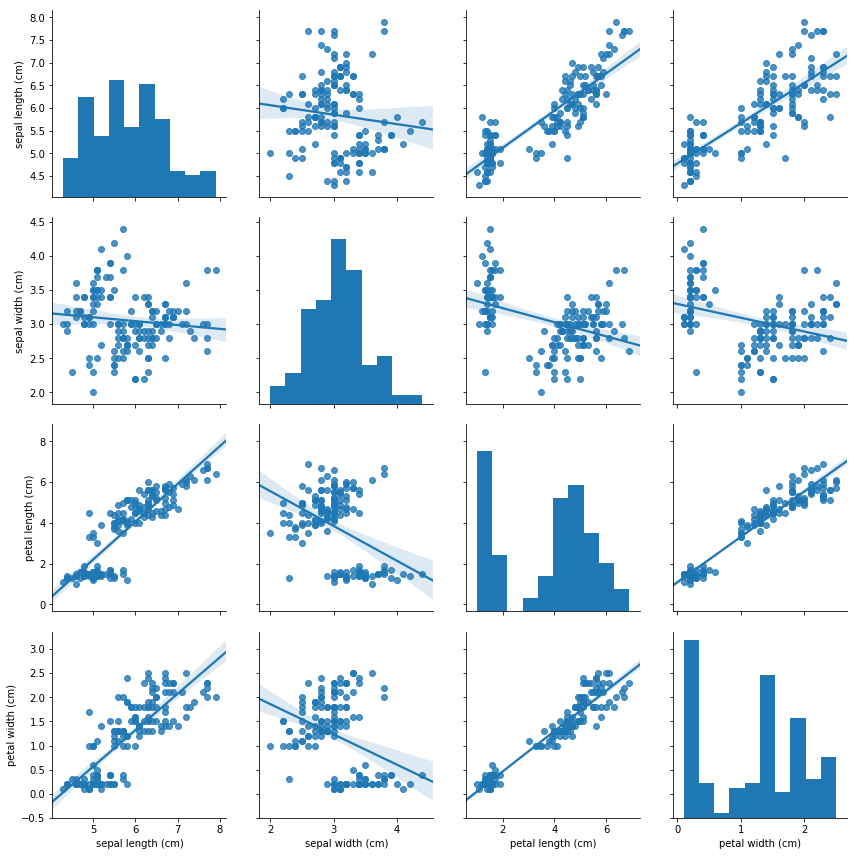

In [6]:
sns.pairplot(df, vars=["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"],
             size=3, diag_kind="hist", kind="reg").savefig('pairplot.png')

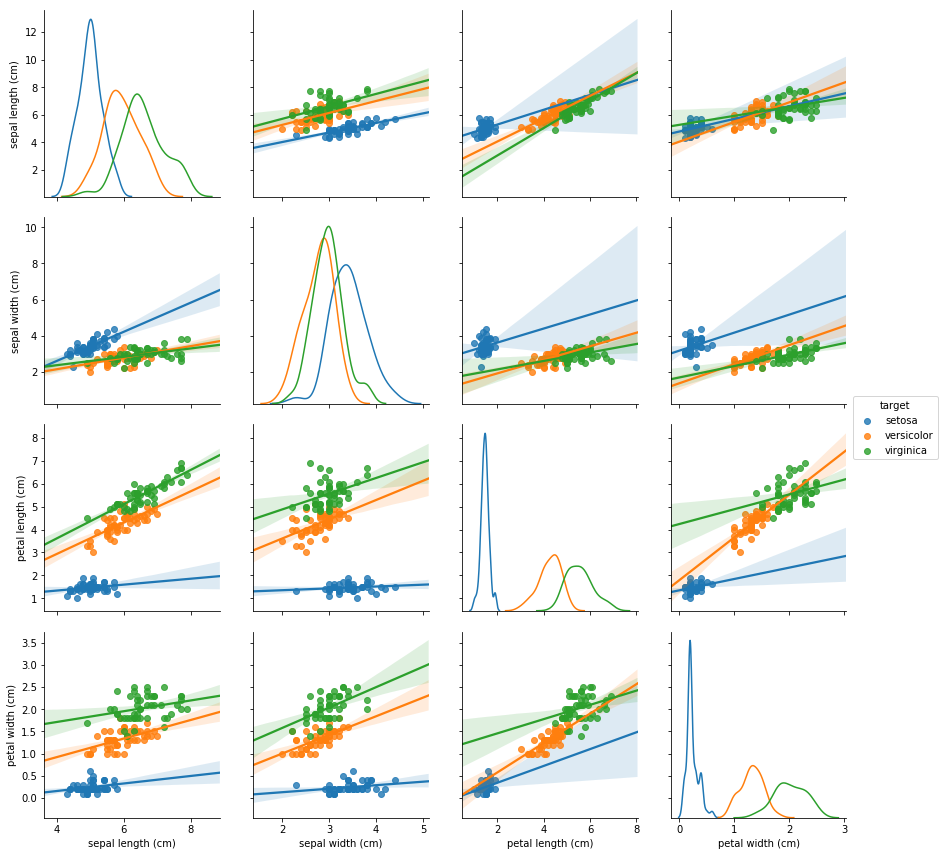

In [7]:
sns.pairplot(df, vars=["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"],
             hue='target', size=3, diag_kind="kde", kind="reg").savefig('pairplot_hue.png')

## 相関行列

In [8]:
cr_matrix = df.corr()
cr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolor,virginica
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,-0.717416,0.079396,0.638020
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,0.595601,-0.464700,-0.130901
petal length (cm),0.871754,-0.420516,1.000000,0.962757,-0.922688,0.201587,0.721102
petal width (cm),0.817954,-0.356544,0.962757,1.000000,-0.887510,0.118376,0.769134
setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000,-0.500000,-0.500000
versicolor,0.079396,-0.464700,0.201587,0.118376,-0.500000,1.000000,-0.500000
virginica,0.638020,-0.130901,0.721102,0.769134,-0.500000,-0.500000,1.000000


## 相関係数をヒートマップで可視化

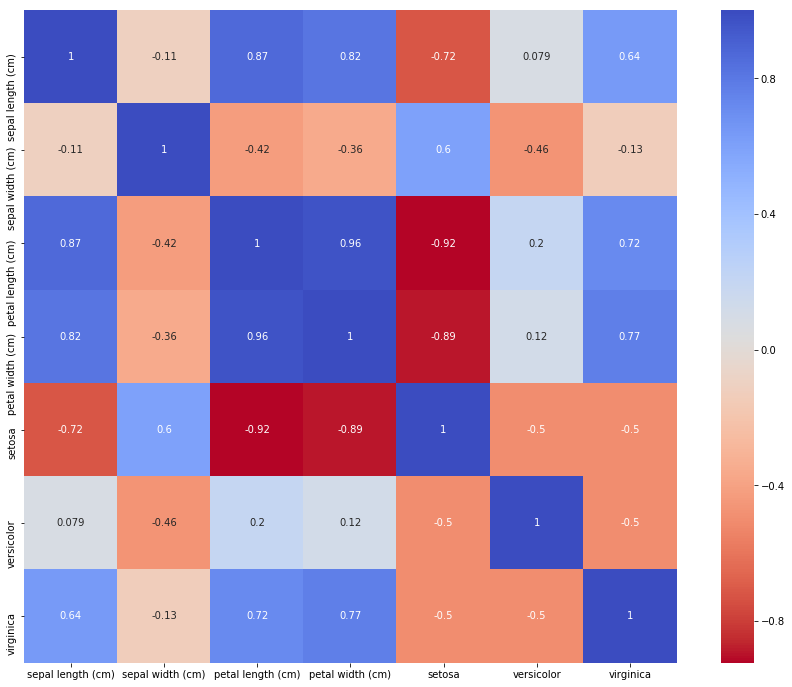

In [19]:
plt.figure(figsize=(16,12))
sns.heatmap(cr_matrix,annot=True, square=True, cmap='coolwarm_r')
plt.savefig('heatmap.png')